In [1]:
### Analyze log predefined in the model
import os
import pandas as pd

nr_of_epoch_start = 40
epoch_info_start = 30
log_file_path = "./Models/exp_1_train.log"


In [13]:
assert os.path.exists(log_file_path)
epoc_log = open(log_file_path, 'r')
_ = epoc_log.readline() # Skip 1st row, i cant manage seek() forgive me :*(|)
epoch_counter=1
epoch_register=[]
for line in epoc_log.readlines():
    line = line[30:-1]
    if "-" in line:
        epoch_counter+=1
        continue
    set_label, value = list(map(lambda element: element.strip(),line.split(":")))
    set, loss_label = set_label.split("/")
    epoch_register.append({"nr_epoch":epoch_counter,"set_name":set,"loss_name":loss_label,"value":float(value)})
dataframe = pd.DataFrame(epoch_register)

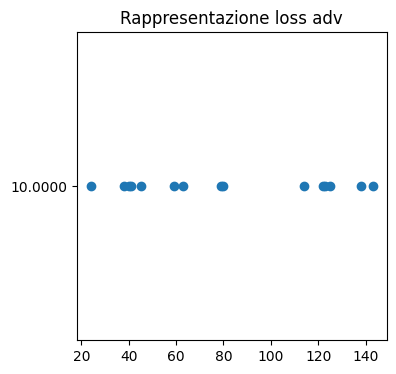

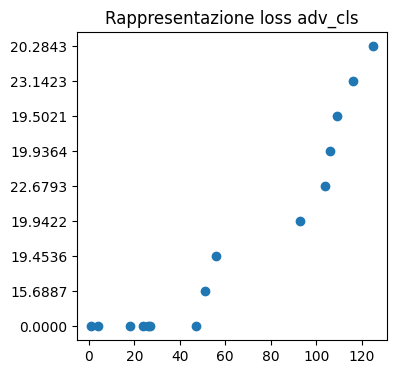

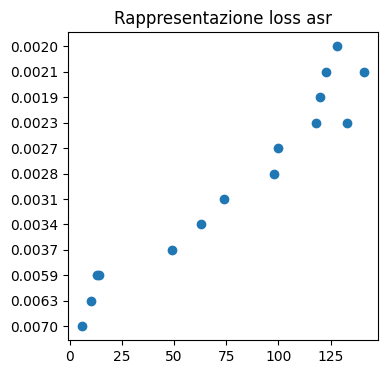

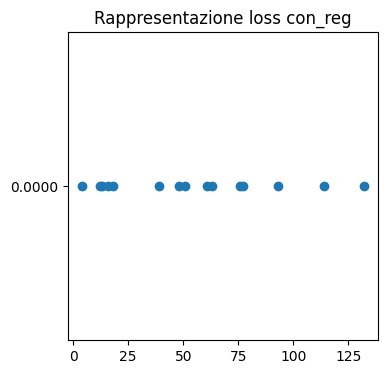

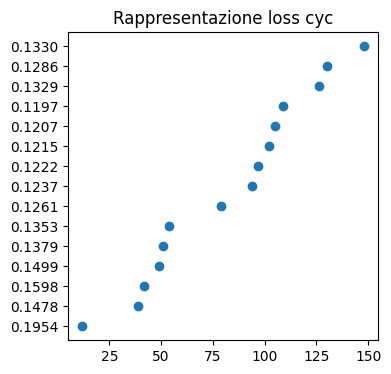

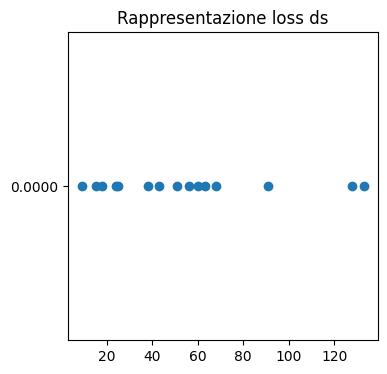

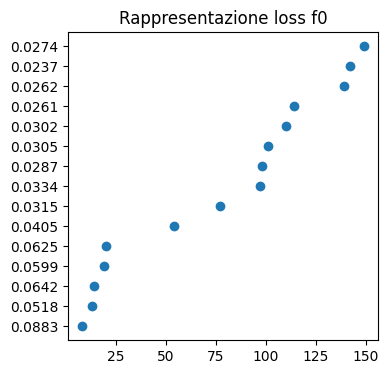

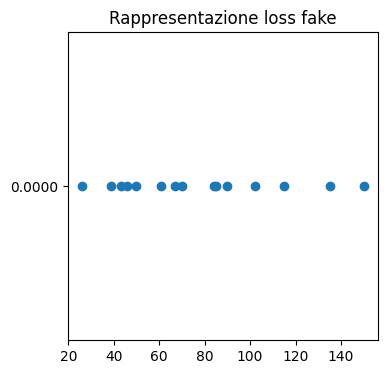

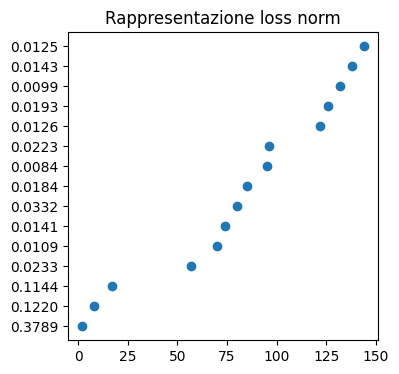

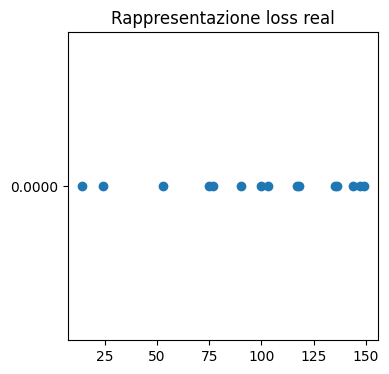

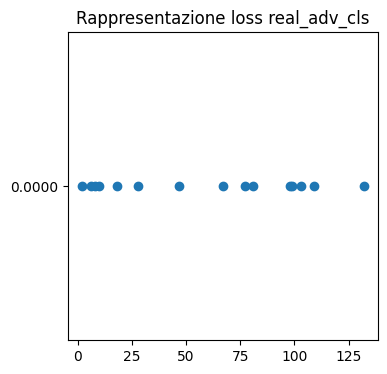

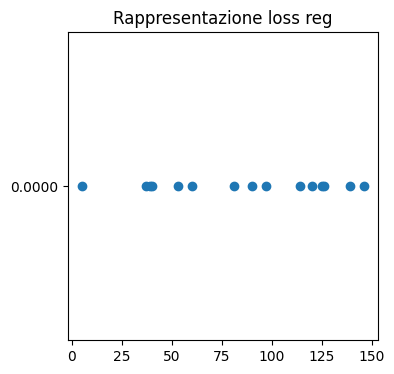

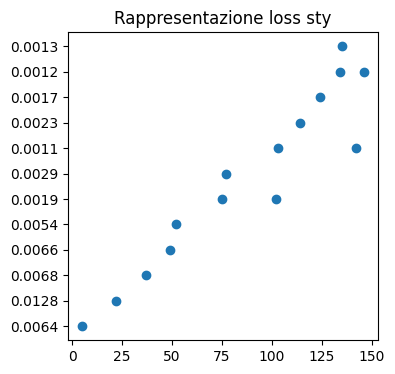

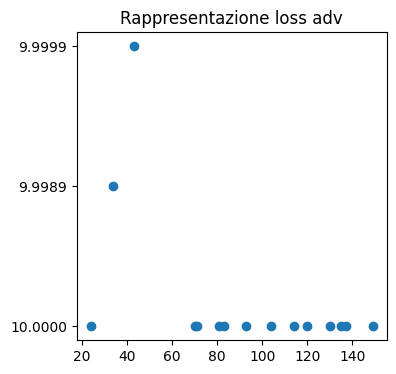

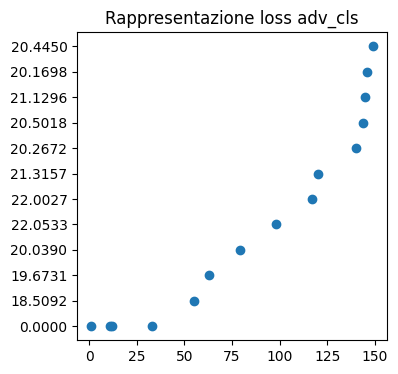

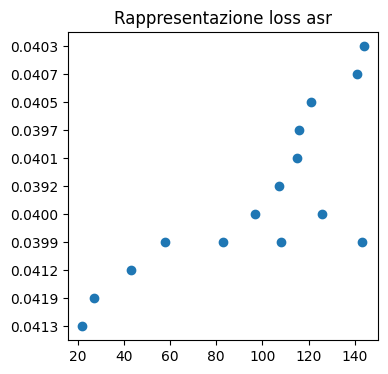

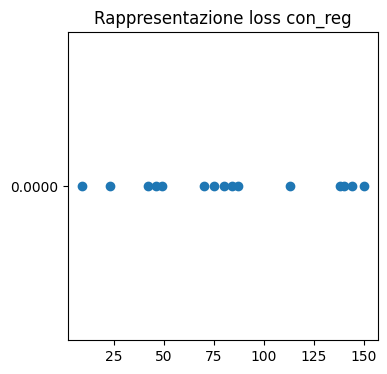

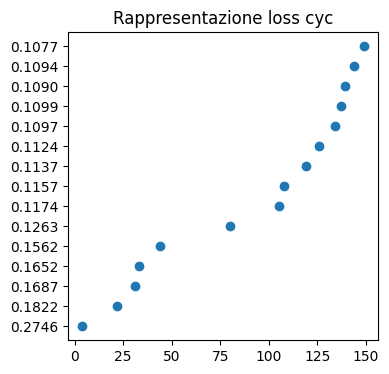

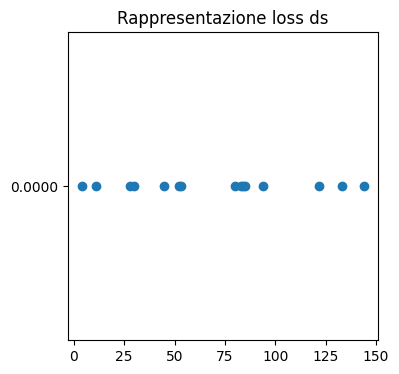

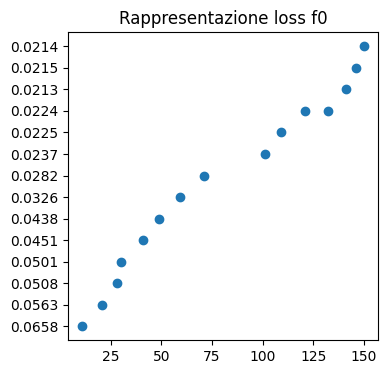

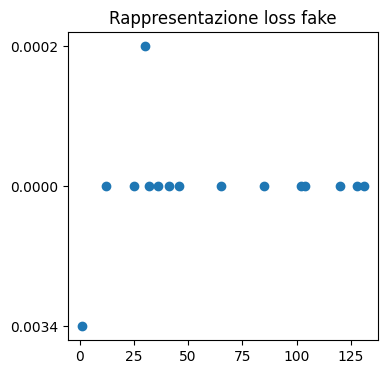

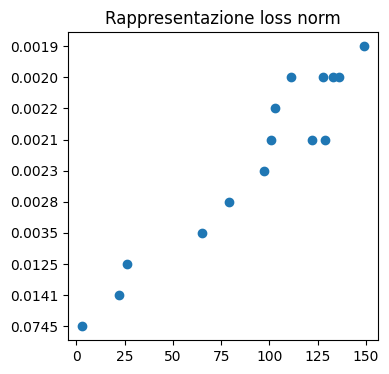

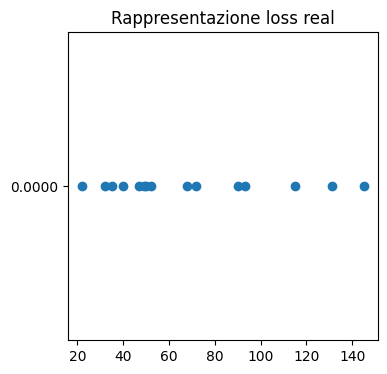

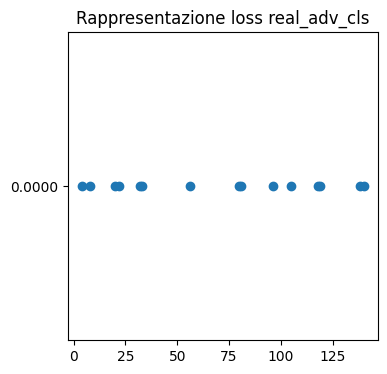

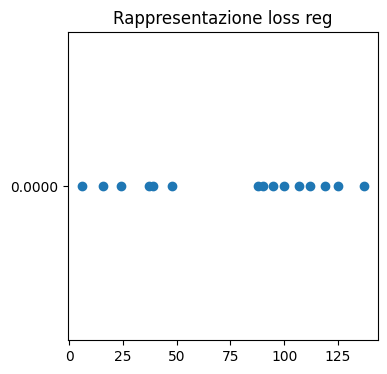

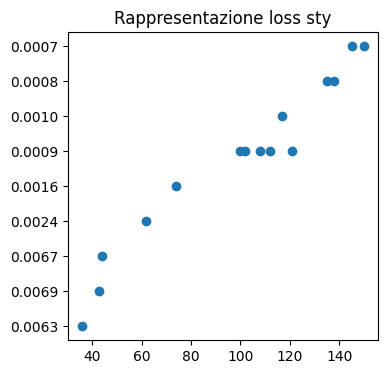

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

for index,group in dataframe.groupby(["set_name","loss_name"]):
    f, ax = plt.subplots(figsize=(4,4))
    subgroup = group.sample(n=15)
    subgroup=subgroup.sort_values("nr_epoch")
    plt.title(f"Rappresentazione loss {group.iloc[0]['loss_name']}")
    plt.scatter(subgroup["nr_epoch"],subgroup["value"])
    plt.show()

